# Predict Future Sales
### Final project for "How to win a data science competition" Coursera course


In this competition you will work with a challenging time-series dataset consisting of daily sales data, kindly provided by one of the largest Russian software firms - 1C Company. 

We are asking you to predict total sales for every product and store in the next month. By solving this competition you will be able to apply and enhance your data science skills.

Links

*   Profile : https://www.kaggle.com/spirit678
*   Competition: https://www.kaggle.com/c/competitive-data-science-predict-future-sales/
*   Git: https://gitlab.com/spirit678/Sales

## Overview

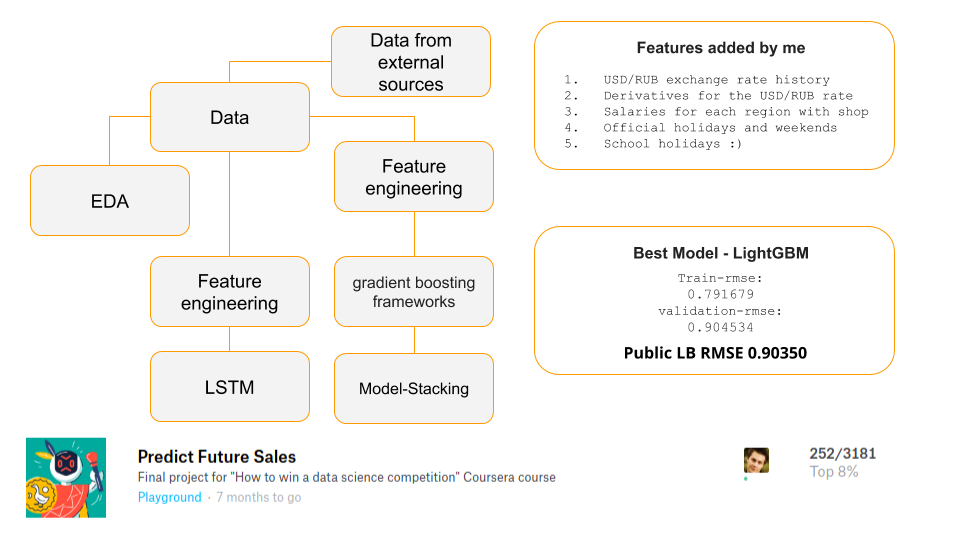

In [1]:
from IPython.display import Image
Image(filename="./figures/1.png")

## Content
* EDA
* Feature engeneering
* XGBoost
* LightGBM
* Catboost
* LSTM
* Stacking
* Final remarks

## EDA

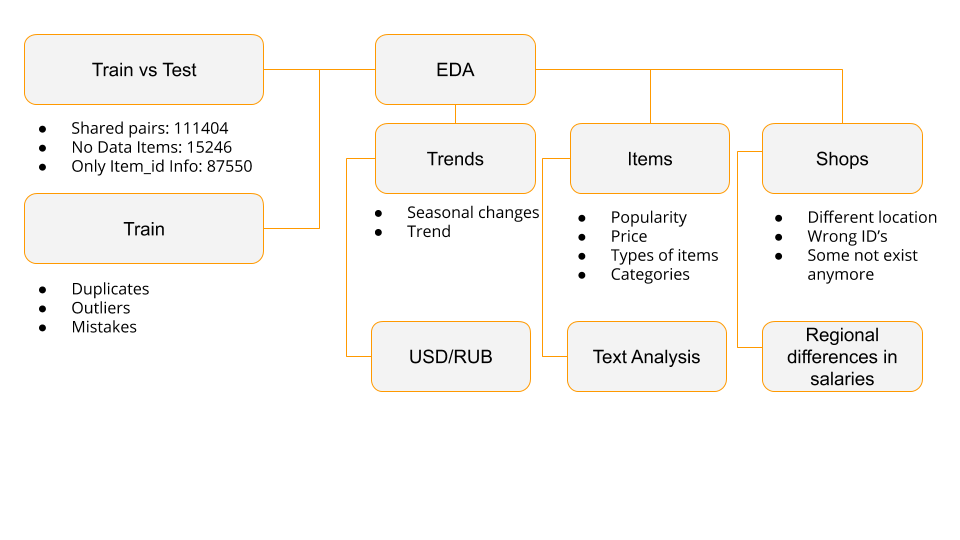

In [2]:
Image(filename="./figures/eda.png")

During EDA I've added some new features.

First of all USD/RUB exchange rate history. Our data lies in the range between Jan 2013 and October 2015. It was a time of confrontation between Russia and Ukrain and sanctions against Russian Federation led to devaluation of RUB. We definitely have to take it into account.

Next, according to text analysis of item names, wich actually represents Consoles, acessories and games I've reasonably desided to add school vacations. Also oficial holidays have been added as a feature.

Russia is quite huge country with great inequality of median income across different parts of federation, so I've used offical statistics for cities(not always) / regions for places where shops located


## Feature engeneering

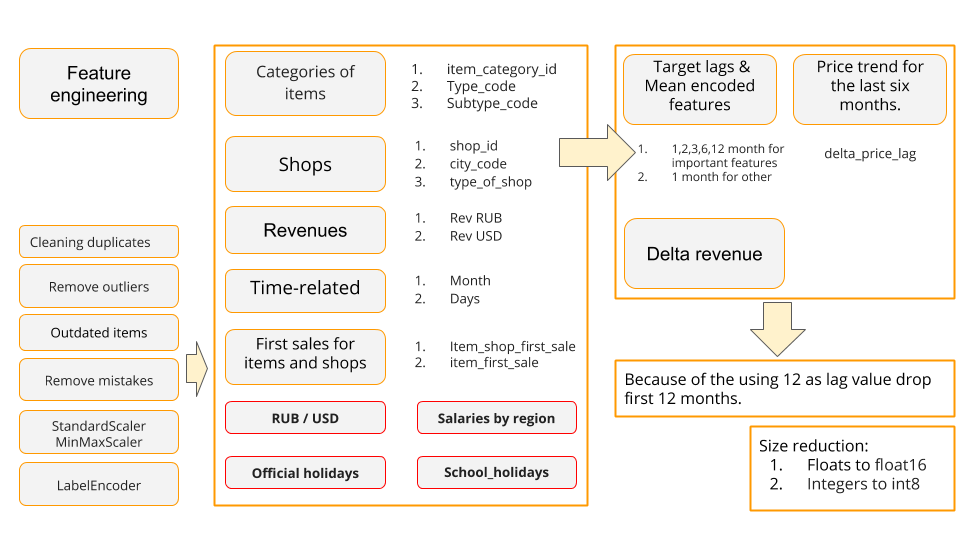

In [3]:
Image(filename="./figures/fe1.png")

In [14]:
import pandas as pd
import pickle
#data = pd.read_pickle('./data.pkl')
#data.head(10)

In [3]:
data.shape

(6639294, 45)

In [ ]:
#data.info()
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6639294 entries, 0 to 6639293
Data columns (total 45 columns):
date_block_num                          int8
shop_id                                 int8
item_id                                 int16
item_cnt_month                          float16
usd_rub                                 float16
city_code                               int8
type_of_shop                            int8
item_category_id                        int8
type_code                               int8
subtype_code                            int8
item_shop_first_sale                    int8
item_first_sale                         int8
item_cnt_month_lag_1                    float16
item_cnt_month_lag_2                    float16
item_cnt_month_lag_3                    float16
item_cnt_month_lag_6                    float16
item_cnt_month_lag_12                   float16
date_avg_item_cnt_lag_1                 float16
date_item_avg_item_cnt_lag_1            float16
date_item_avg_item_cnt_lag_2            float16
date_item_avg_item_cnt_lag_3            float16
date_item_avg_item_cnt_lag_6            float16
date_item_avg_item_cnt_lag_12           float16
date_shop_avg_item_cnt_lag_1            float16
date_shop_avg_item_cnt_lag_2            float16
date_shop_avg_item_cnt_lag_3            float16
date_shop_avg_item_cnt_lag_6            float16
date_shop_avg_item_cnt_lag_12           float16
date_cat_avg_item_cnt_lag_1             float16
date_shop_cat_avg_item_cnt_lag_1        float16
date_shop_type_avg_item_cnt_lag_1       float16
date_shop_subtype_avg_item_cnt_lag_1    float16
date_city_avg_item_cnt_lag_1            float16
date_shop_kind_avg_item_cnt_lag_1       float16
date_item_city_avg_item_cnt_lag_1       float16
date_type_avg_item_cnt_lag_1            float16
date_subtype_avg_item_cnt_lag_1         float16
delta_price_lag                         float16
delta_revenue_lag_1                     float16
delta_revenue_usd_lag_1                 float16
month                                   int8
salaries                                float16
days                                    int8
holidays                                int8
school_holidays                         int8
dtypes: float16(31), int16(1), int8(13)
memory usage: 576.2 MB

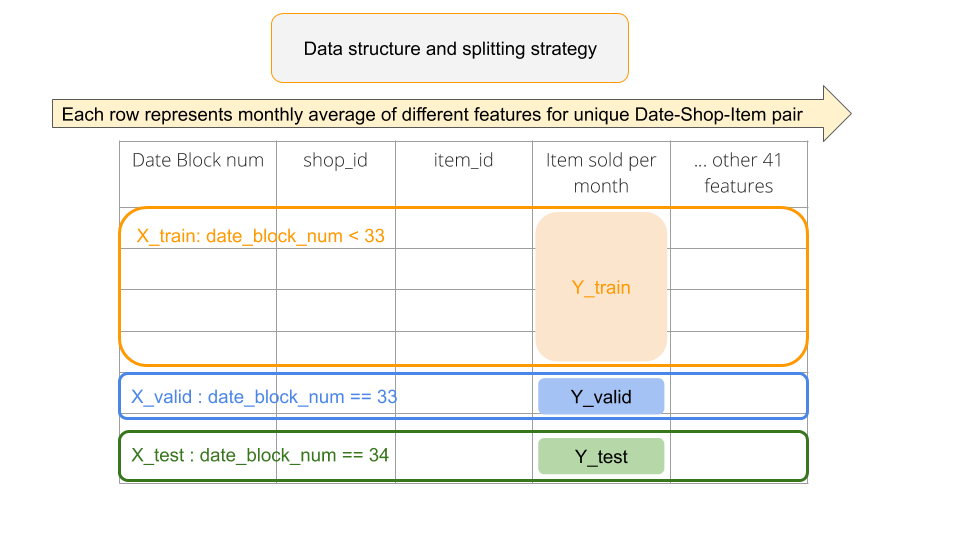

In [5]:
Image(filename="./figures/fe2.png")

## XGBoost

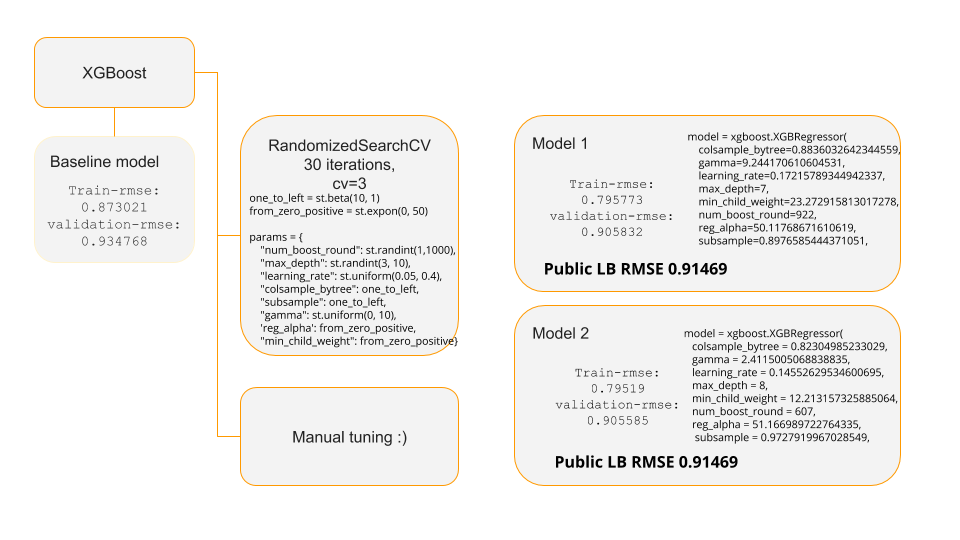

In [7]:
Image(filename="./figures/xgb.png")

Feature importance for xgboost model 2

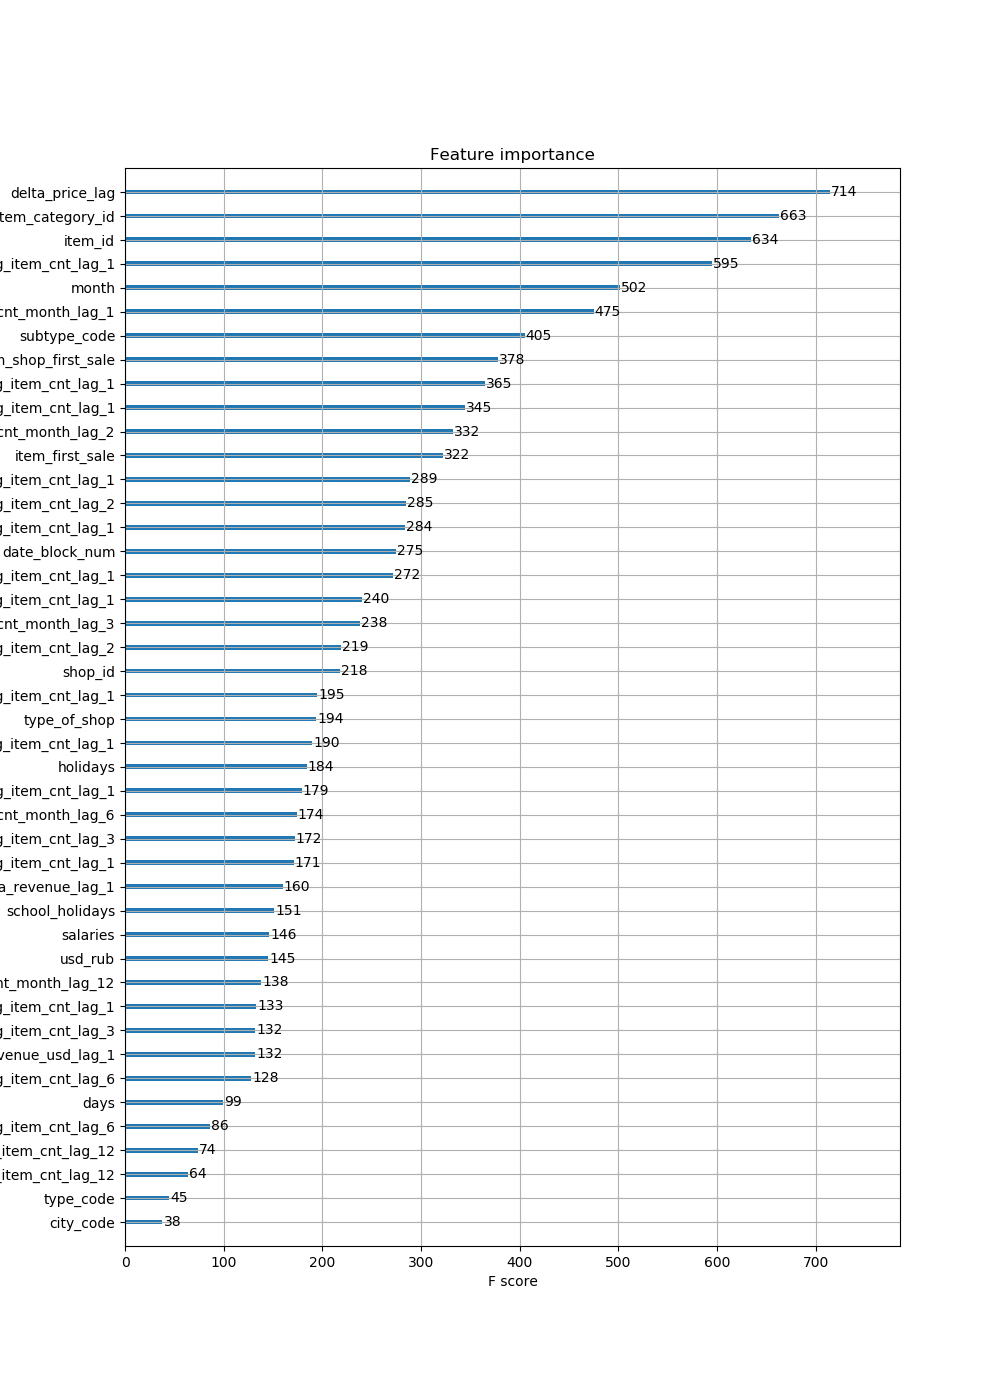

In [8]:
Image(filename="./figures/Xgboost.png")

## LightGBM

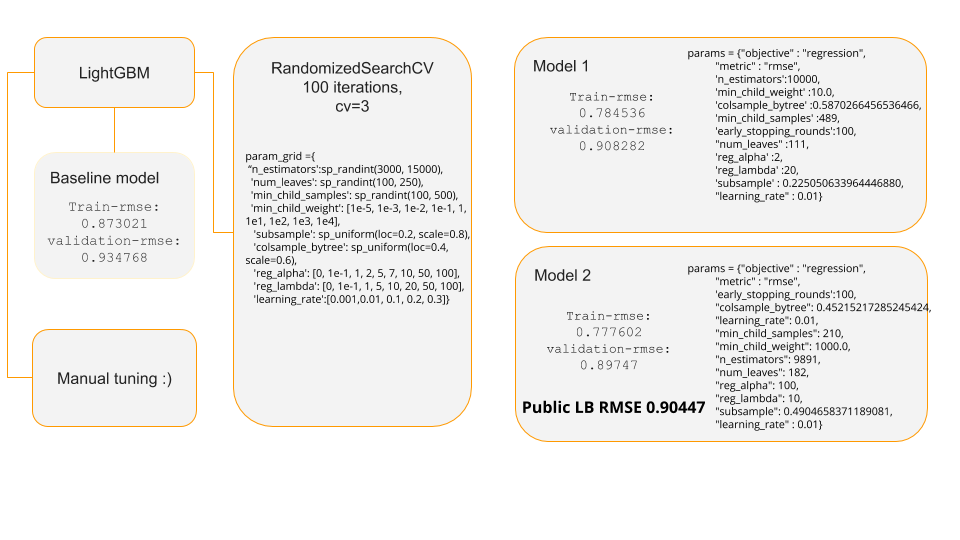

In [9]:
Image(filename="./figures/lgbm.png")

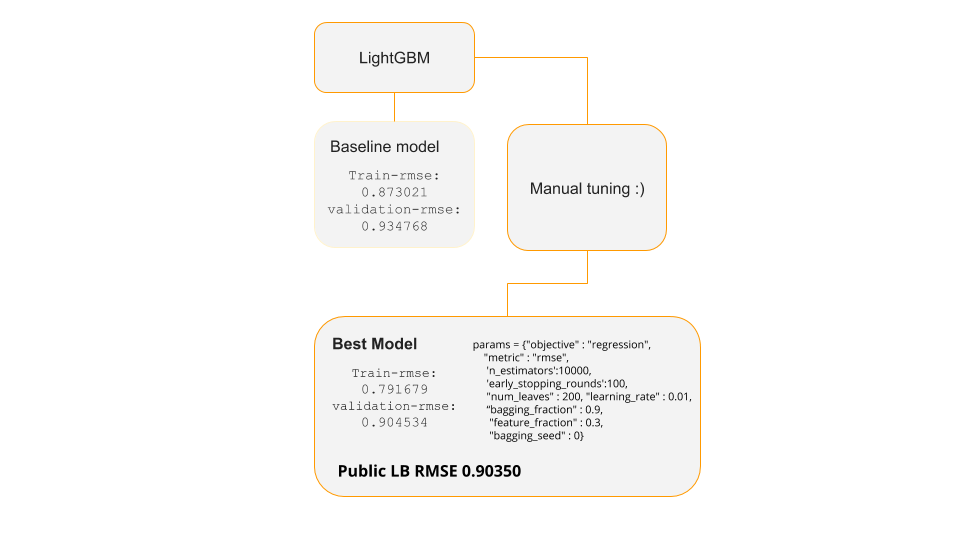

In [10]:
Image(filename="./figures/lgbm2.png")

Best model built with LightGBM and manual tuning in comparison with XGBoost where RandomizedSearchCV shows better results

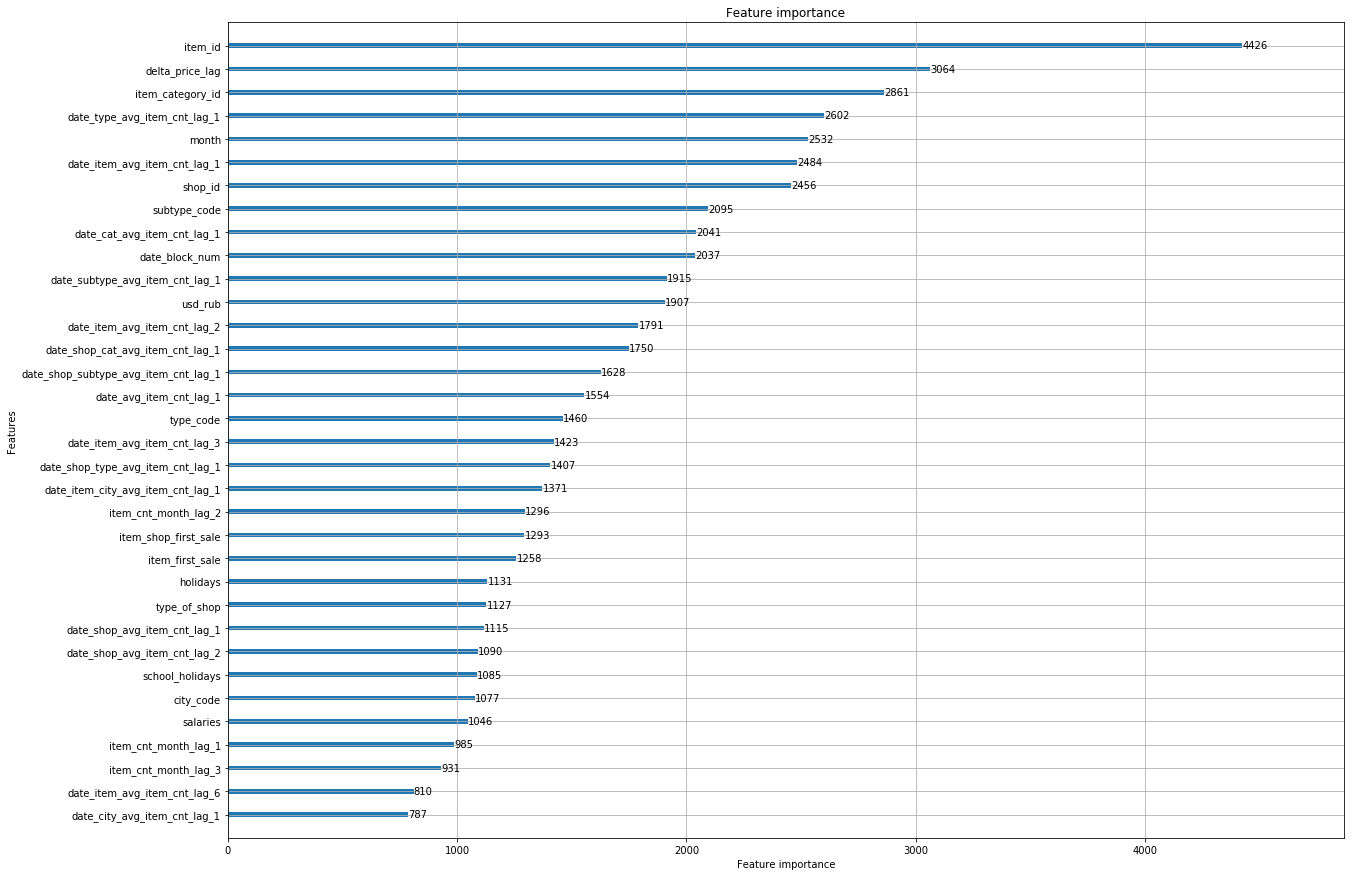

In [11]:
Image(filename="./figures/lgbm_f.png")

All the futures added by me is quite important for the model

## Catboost

In [ ]:
model = CatBoostRegressor(iterations=2000,
                          learning_rate=0.03,
                          task_type='GPU',
                          eval_metric='RMSE',
                          verbose = 100,
                          max_ctr_complexity = 4,
                          depth=6)

In [ ]:
bestTest = 0.8970961544
bestIteration = 1986
Shrink model to first 1987 iterations.
public score = 0.92043

I guess it's not the best result and may be optimized to the level of lgbm, unfortunatelly I dont have a time for this.

## LSTM

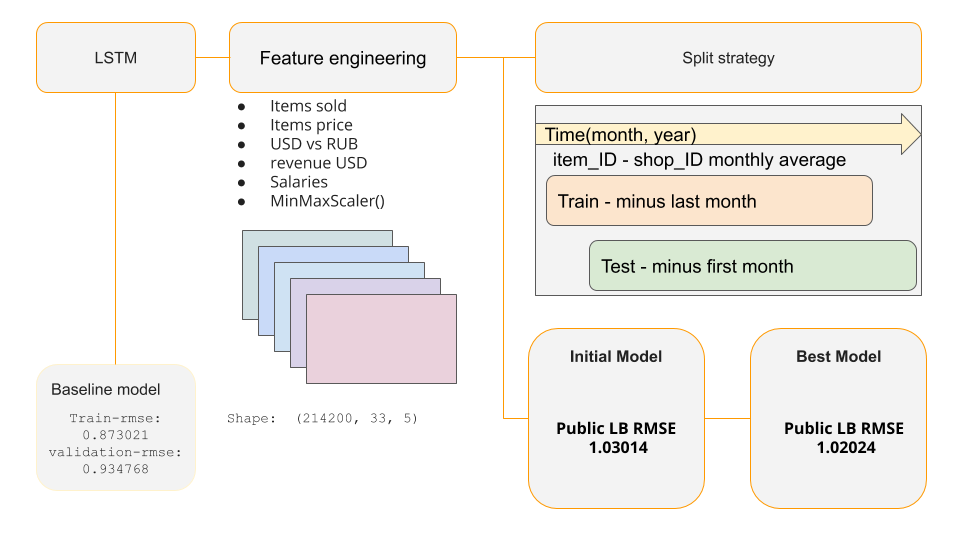

In [12]:
Image(filename="./figures/lstm.png")

LSTM was the first thing to try, becouse even with simple feature engineering it's produce 1.14 - 1.12 RMSE. 

After few days of experimenting I've found most efficient model architecture, but it is still not as efficient as even XGBoost, so my decission was not to waste a time with that.

Best model architectures was (16,32,1) and (100,1)

In [ ]:
model_lstm = Sequential()
model_lstm.add(LSTM(16, input_shape=(X.shape[1], X.shape[2]),return_sequences=True))
model_lstm.add(Dropout(0.5))
model_lstm.add(LSTM(32))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(1))


model_lstm.compile(optimizer="adam", loss=root_mean_squared_error, metrics=[root_mean_squared_error])

## Stacking

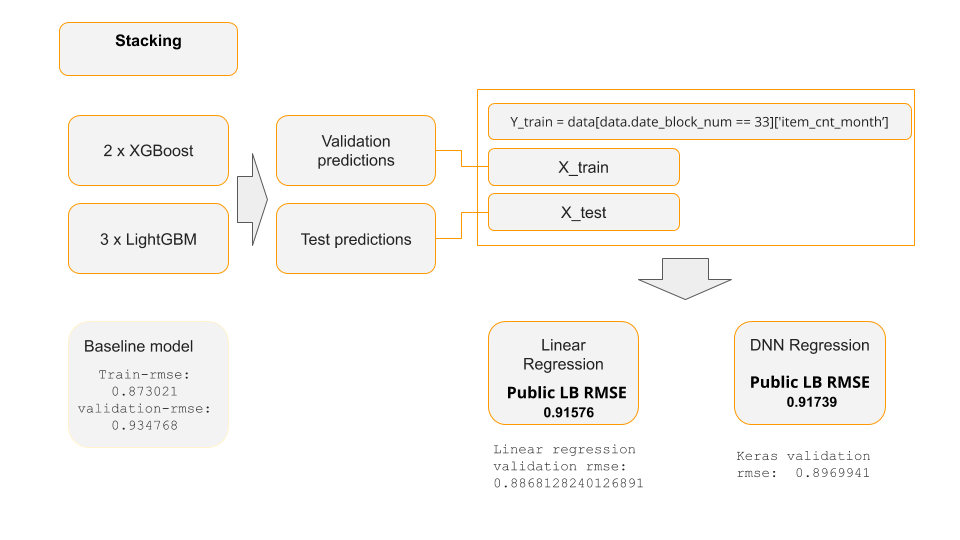

In [13]:
Image(filename="./figures/Stack.png")

Stacking in my case was not able to outperform ligthtGBM.

I see few reasons of that:

Models are quite similar between each other, lack of time for optimization, regularization and fighting with overfitting.

## Final remarks

It's the first time I worked with Time-Series data. So I've learned lot of things :)
Also I have never used LSTMs & gradient boosters before. 

My goal was to improve model enougth to reach 0.89 RMSE. My intuition said that with 0.9035 I am close to the limit.

To reach accuracy close to leader's places I need completely different approach:

    1.) Use the difference between Train and Test datasets. 
    Remember that not all the data from test is represented in train.
    
    2.) Utilize a bit different approaches
    (E.g for some data I will need classifiers, not regressors)
    
    3.) I need more heterogenious models for stacking